In [1]:
#%matplotlib notebook
import h5py, pickle
import numpy as np
import numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as LRG
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from skimage.measure import block_reduce
import seaborn as sn
import lib.sot as crr

para = {'figure.figsize'  : (8, 6) }
plt.rcParams.update(para)

mods_ = ['OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK', '16APSK',\
         '32APSK', '64APSK', '128APSK', '16QAM', '32QAM', '64QAM', '128QAM', \
         '256QAM', 'AM-SSB-WC', 'AM-SSB-SC', 'AM-DSB-WC', 'AM-DSB-SC', 'FM', 'GMSK', 'OQPSK']
mod = [i for i in range(0, 24) if i not in [17,18,19,20,21]]  # all digital mods.

hf = h5py.File('../../dataset/201801a_data_test.h5', 'r+')
x = hf['test']
p = int(len(x) / 24)
pp = int(p / 26)
pts = 300
tr = int(pts // 10) * 9
te = pts - tr

def create_label(cls, num):
    mods = range(cls)
    mo = []
    for m in mods:
        mo.append([m] * num)
    mo = np.hstack(mo)
    return mo

def lda(out_tr, yy_tr, out_te, yy_te):
    lda = LDA().fit(out_tr, yy_tr)
    cm = confusion_matrix(yy_te, lda.predict(out_te))
    return lda.score(out_te, yy_te), cm

def run(snr, trans):
    ccsd0 = []
    ccsd1 = []
    for i in mod:
        for j in snr:
            base = i*p + j*pp + 2
            s = x[base:(base + pts),:,0] + 1j*x[base:(base + pts),:,1]
            s = getattr(crr, trans)(s)
            s = block_reduce(s, block_size=(1, 4, 4), func=np.max).reshape((pts, -1))
            #s = block_reduce(s, block_size=(1, 32, 1), func=np.max).reshape((pts, -1))
            ccsd0.append(s[:tr, :])
            ccsd1.append(s[tr::, :])

    ccsd0 = np.asarray(ccsd0)
    ccsd1 = np.asarray(ccsd1)
    l = ccsd0.shape[-1]
    if np.iscomplexobj(ccsd0):
        print ('complex trans')
        ccsd0, ccsd1 = np.abs(ccsd0), np.abs(ccsd1)
        
    ccsd0 = ccsd0.reshape((-1, l))
    ccsd1 = ccsd1.reshape((-1, l))
    print (ccsd0.shape, ccsd1.shape)
    return ccsd0, ccsd1


## graph

(41040, 4096) (4560, 4096)
start test
acc: 0.30394736842105263


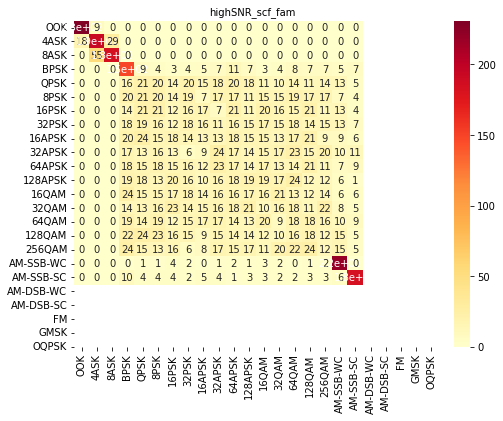

(41040, 4096) (4560, 4096)
start test
acc: 0.2149122807017544


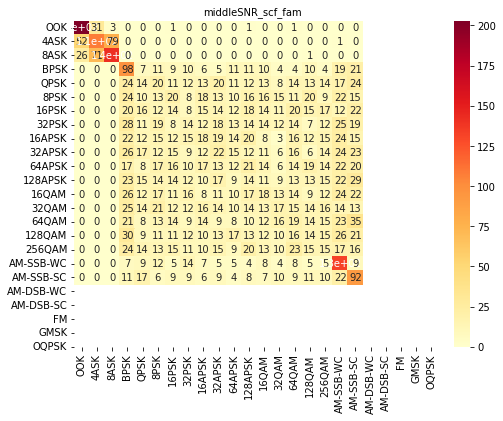

(41040, 4096) (4560, 4096)
start test
acc: 0.06666666666666667


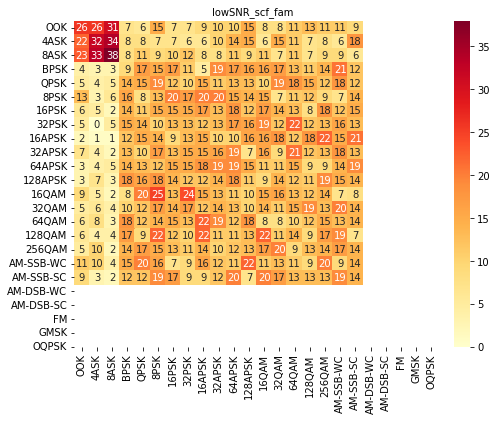

In [2]:
trans = 'scf_fam'

snr = range(18,26)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "highSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  MID SNR.
snr = range(8,16)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "middleSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  LOW SNR.
snr = range(0,8)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "lowSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()


In [ ]:
trans = 'CCSD'

snr = range(18,26)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "highSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  MID SNR.
snr = range(8,16)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "middleSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  LOW SNR.
snr = range(0,8)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "lowSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()


In [ ]:
trans = 'CHTC'

snr = range(18,26)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "highSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  MID SNR.
snr = range(8,16)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "middleSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  LOW SNR.
snr = range(0,8)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "lowSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()


## profiles

In [ ]:
trans = 'CCSD'

snr = range(18,26)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "highSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  MID SNR.
snr = range(8,16)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "middleSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  LOW SNR.
snr = range(0,8)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "lowSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()


In [ ]:
trans = 'CHTC'

snr = range(18,26)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "highSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  MID SNR.
snr = range(8,16)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "middleSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  LOW SNR.
snr = range(0,8)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "lowSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()


In [ ]:
trans = 'scf_fam'

snr = range(18,26)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "highSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  MID SNR.
snr = range(8,16)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "middleSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()

#######################  LOW SNR.
snr = range(0,8)
x_tr, x_te = run(snr, trans)
yy_tr = create_label(len(mod), tr * len(snr))
yy_te = create_label(len(mod), te * len(snr))

print ('start test')
sc, cm = lda(x_tr, yy_tr, x_te, yy_te)
print ('acc:', sc)
fig = plt.figure()
name = "lowSNR_{}".format(trans)
plt.title(name, fontsize =10)
sn.heatmap(cm, cmap='YlOrRd', annot=True, xticklabels=mods_, yticklabels=mods_, annot_kws={"size": 10})
plt.show()
